Данные представляют собой извлеченные из временных рядов признаки. Временные ряды - это шахматные партии, которые представляли собой последовательность значений одной переменной *сp - численной оценки текущего преимущества в шахматной партии*, поэтому это название можно встретить в названии признаков.

В наборе присутствуют партии 8-ми типов. Вам нужно построить модель, реализующую многоклассовую классификацию.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/shogi/features_dblm_1.zip"

Archive:  /content/gdrive/My Drive/Colab Notebooks/shogi/features_dblm_1.zip
  inflating: features_dblm_1.csv     


In [ ]:
data = pd.read_csv('features_dblm_1.csv', delimiter=',')

In [ ]:
data

,id_pl__variance_larger_than_standard_deviation,id_pl__has_duplicate_max,id_pl__has_duplicate_min,id_pl__has_duplicate,id_pl__sum_values,id_pl__abs_energy,id_pl__mean_abs_change,id_pl__mean_change,id_pl__mean_second_derivative_central,id_pl__median,...,cp__permutation_entropy__dimension_6__tau_1,cp__permutation_entropy__dimension_7__tau_1,cp__query_similarity_count__query_None__threshold_0.0,"cp__matrix_profile__feature_""min""__threshold_0.98","cp__matrix_profile__feature_""max""__threshold_0.98","cp__matrix_profile__feature_""mean""__threshold_0.98","cp__matrix_profile__feature_""median""__threshold_0.98","cp__matrix_profile__feature_""25""__threshold_0.98","cp__matrix_profile__feature_""75""__threshold_0.98",cp__mean_n_absolute_max__number_of_maxima_7
1 10053,0.0,1.0,1.0,1.0,60.0,60.0,0.0,0.0,0.0,1.0,...,3.956922,3.988984,0.0,1.029040,3.485600,2.330003,2.396305,1.910154,2.797375,7911.571429
1 10067,0.0,1.0,1.0,1.0,30.0,30.0,0.0,0.0,0.0,1.0,...,3.218876,3.178054,0.0,1.029040,3.485600,2.330003,2.396305,1.910154,2.797375,123.571429
1 10069,0.0,1.0,1.0,1.0,38.0,38.0,0.0,0.0,0.0,1.0,...,3.454499,3.465736,0.0,1.029040,3.485600,2.330003,2.396305,1.910154,2.797375,549.857143
1 10079,0.0,1.0,1.0,1.0,40.0,40.0,0.0,0.0,0.0,1.0,...,3.555348,3.526361,0.0,1.029040,3.485600,2.330003,2.396305,1.910154,2.797375,775.142857
1 10084,0.0,1.0,1.0,1.0,46.0,46.0,0.0,0.0,0.0,1.0,...,3.713572,3.688879,0.0,1.029040,3.485600,2.330003,2.396305,1.910154,2.797375,5300.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997 54931,0.0,1.0,1.0,1.0,46859.0,46718423.0,0.0,0.0,0.0,997.0,...,3.737670,3.713572,0.0,1.060723,3.480470,2.397731,2.459151,1.998038,2.838418,737.857143
997 55217,0.0,1.0,1.0,1.0,50847.0,50694459.0,0.0,0.0,0.0,997.0,...,3.726856,3.775856,0.0,1.060723,3.480470,2.397731,2.459151,1.998038,2.838418,4511.142857
997 56464,0.0,1.0,1.0,1.0,41874.0,41748378.0,0.0,0.0,0.0,997.0,...,3.573450,3.583519,0.0,1.060723,3.480470,2.397731,2.459151,1.998038,2.838418,800.714286
998 47733,0.0,1.0,1.0,1.0,30938.0,30876124.0,0.0,0.0,0.0,998.0,...,3.258097,3.218876,0.0,1.060723,3.480470,2.397731,2.459151,1.998038,2.838418,769.428571


## Задание 1

Найдите наибольшее значение столбца 4.

In [ ]:
max(data.iloc[:,4])

951405.0

Мы узнали значение самой большой суммы значений cp в течении игры.

## Задание 2

Найдите значение столбца *'cp__sum_values'*, соответствующее наименьшему значению столбца *'cp__length'*.

In [ ]:
data.loc[data.cp__length.nsmallest(1).index[0],'cp__sum_values']

197.0

Мы узнали для игры с наименьшим количеством ходов, чему равна сумма значений cp для этих ходов. 

## Задание 3

Нарисуйте гистограму по значениям столбца *'cp__length'*.

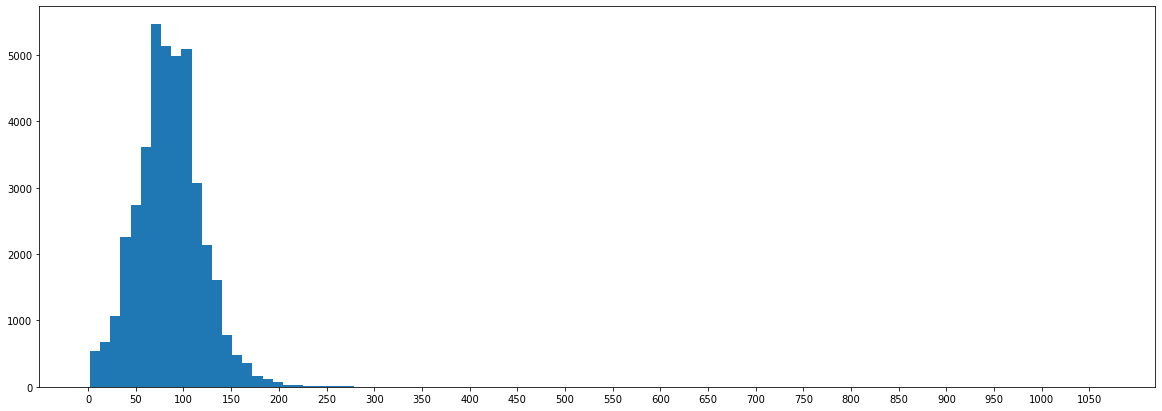

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 7))
plt.xticks(np.arange(0, 1066, step=50))
n,bins,patch = plt.hist(data.loc[:,'cp__length'], bins=100)

Мы получили распределение продолжительности игры. Из графика видно среднюю продолжительность игры и в каких пределах лежит продолжительность большинства игр.

# Кластеризация методом k средних

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

In [ ]:
data['class_labels'] = kmeans.labels_

In [ ]:
kmeans.cluster_centers_

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.03032176e+00, 2.88071613e+00, 3.66574129e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.97610385e+00, 2.83241241e+00, 3.29524287e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.96417539e+00, 2.83162665e+00, 2.96303774e+03],
       [0.00000000e+00, 9.94350002e-01, 9.94350002e-01, ...,
        1.93726139e+00, 2.81737153e+00, 2.84262562e+03]])

In [ ]:
data['class_labels'].value_counts()

3    40356
1    17431
2    12085
0     9595
Name: class_labels, dtype: int64

In [ ]:
data_min = data[:300]

In [ ]:
data_min.to_csv('features_with_class_min_2.csv', index=True, index_label=False)

In [ ]:
from google.colab import files
files.download('features_with_class_min_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Провели кластеризацию по всем доступным данным, чтобы получить массив целевых значений для дальнейших тренировочных заданий по классификации.